- Logistic Regression은 두 클래스를 Line이나 Plane으로 나눌 수 있다는 가정을 분류하는 모델이다.

## 1. Logistic Classifier

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [10]:
N = 100
D = 2

X = np.random.randn(N,D)
ones = np.ones(N).reshape(100, 1)
Xb = np.concatenate((ones, X), axis=1)

In [12]:
w = np.random.randn(D + 1)
z = Xb.dot(w)

In [13]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [14]:
print(sigmoid(z))

[ 0.62731751  0.50720963  0.56877892  0.72253721  0.78690908  0.68371822
  0.77333807  0.44568668  0.23583862  0.32768686  0.45148769  0.72693831
  0.5175558   0.48760325  0.30772742  0.36695789  0.66656026  0.6066151
  0.69075288  0.40214087  0.32801643  0.58071378  0.79480117  0.40955311
  0.64964771  0.18470083  0.49087308  0.67381711  0.72468633  0.5068086
  0.27878969  0.2477008   0.2480146   0.56385298  0.80678025  0.5980646
  0.96332821  0.77343805  0.34868898  0.65203062  0.76646799  0.62494768
  0.58832041  0.70049068  0.71583936  0.68109961  0.82929153  0.39401677
  0.75613463  0.4080472   0.88843465  0.5958294   0.07528809  0.86168596
  0.75613153  0.60046322  0.24638487  0.72766492  0.62615462  0.55280972
  0.73535279  0.36278047  0.66616965  0.20066096  0.64923317  0.14603442
  0.38988601  0.30858633  0.38306563  0.29112883  0.50686837  0.80229386
  0.49144294  0.35679636  0.64714035  0.18670454  0.44215013  0.43905895
  0.57922861  0.47098715  0.36657467  0.68804909  0.70

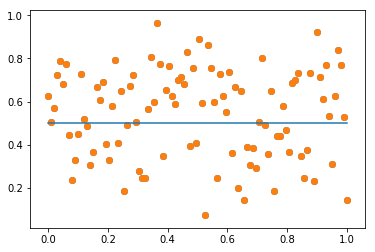

In [43]:
x = np.linspace(0, 1, 100)
plt.scatter(x, sigmoid(z))
plt.plot(x, [0.5] * 100)
plt.show()

## 2. E-commerce Data

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('./ecommerce_data.csv')

In [84]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,-0.816161,-0.407869,0,3,0
1,1,0.139531,-0.498929,0,2,1
2,1,-0.816161,-1.037804,1,1,0
3,1,0.139531,0.618313,1,1,2
4,0,0.139531,0.981728,1,1,2


In [83]:
df['user_action'].unique()

array([0, 1, 2, 3], dtype=int64)

### 2-1. preprocess

In [71]:
def get_data():
    df = pd.read_csv('./ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t+D-1] = 1
    
    Z = np.zeros((N,4))
    Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # X2[:, -4:] = Z
    assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    return X2, Y

In [72]:
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

### 2-2. prediction

In [73]:
X, Y = get_binary_data()

In [77]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [78]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [79]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [80]:
P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)

In [81]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [82]:
print("Score", classification_rate(Y, predictions))

Score 0.540201005025
